<a href="https://colab.research.google.com/github/AbylayDalabay/Deep-Learning/blob/main/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drawing dot of words

In [68]:
import gensim
import gensim.downloader as api
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [69]:
#import pretrained model
glove_model_path = "glove-wiki-gigaword-300"
print(api.info(glove_model_path))
glove = api.load(glove_model_path)


{'num_records': 400000, 'file_size': 394362229, 'base_dataset': 'Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)', 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/glove-wiki-gigaword-300/__init__.py', 'license': 'http://opendatacommons.org/licenses/pddl/', 'parameters': {'dimension': 300}, 'description': 'Pre-trained vectors based on Wikipedia 2014 + Gigaword, 5.6B tokens, 400K vocab, uncased (https://nlp.stanford.edu/projects/glove/).', 'preprocessing': 'Converted to w2v format with `python -m gensim.scripts.glove2word2vec -i <fname> -o glove-wiki-gigaword-300.txt`.', 'read_more': ['https://nlp.stanford.edu/projects/glove/', 'https://nlp.stanford.edu/pubs/glove.pdf'], 'checksum': '29e9329ac2241937d55b852e8284e89b', 'file_name': 'glove-wiki-gigaword-300.gz', 'parts': 1}


In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
def plot_embeds(word_list, title = None, word_embeddings = None, figsize = (12,7)) :
    # pca on the embedding
    pca = PCA(n_components=2)
    X = pca.fit_transform(glove[word_list])

    ax = plt.figure(figsize=figsize)
    ax.subplots()
    _ = plt.scatter(X[:,0], X[:,1])
    for label, point in list(zip(word_list, X)):
        _ = plt.annotate(label, (point[0] - 0.075, point[1] + 0.075))
    # Turn off tick labels
    plt.title(title)
    plt.xticks([])
    plt.yticks([])

In [72]:
def find_most_similar (vec, words = None) :
    # vec: resulting vector from word Arithmetic
    # words: list of words that comprise vec
    s = glove.similar_by_vector(vec, topn = 10)
    # filter out words like "king" and "man", or else they will be included in the similarity
    if (words != None) :
        word_sim = list(filter(lambda x: (x[0] not in words), s))[:10]
    else :
        return (s[:10])
    return (word_sim)

In [112]:
glove["cat"]

array([-0.29353  ,  0.33247  , -0.047372 , -0.12247  ,  0.071956 ,
       -0.23408  , -0.06238  , -0.0037192, -0.39462  , -0.69411  ,
        0.36731  , -0.12141  , -0.044485 , -0.15268  ,  0.34864  ,
        0.22926  ,  0.54361  ,  0.25215  ,  0.097972 , -0.087305 ,
        0.87058  , -0.12211  , -0.079825 ,  0.28712  , -0.68563  ,
       -0.27265  ,  0.22056  , -0.75752  ,  0.56293  ,  0.091377 ,
       -0.71004  , -0.3142   , -0.56826  , -0.26684  , -0.60102  ,
        0.26959  , -0.17992  ,  0.10701  , -0.57858  ,  0.38161  ,
       -0.67127  ,  0.10927  ,  0.079426 ,  0.022372 , -0.081147 ,
        0.011182 ,  0.67089  , -0.19094  , -0.33676  , -0.48471  ,
       -0.35406  , -0.15209  ,  0.44503  ,  0.46385  ,  0.38409  ,
        0.045081 , -0.59079  ,  0.21763  ,  0.38576  , -0.44567  ,
        0.009332 ,  0.442    ,  0.097062 ,  0.38005  , -0.11881  ,
       -0.42718  , -0.31005  , -0.025058 ,  0.12689  , -0.13468  ,
        0.11976  ,  0.76253  ,  0.2524   , -0.26934  ,  0.0686

In [73]:
find_most_similar(glove["cat"])

[('cat', 1.0),
 ('dog', 0.6816747188568115),
 ('cats', 0.6815837025642395),
 ('pet', 0.5870364904403687),
 ('dogs', 0.5407667756080627),
 ('feline', 0.48979711532592773),
 ('monkey', 0.48794347047805786),
 ('horse', 0.4732131063938141),
 ('pets', 0.46348586678504944),
 ('rabbit', 0.4608757495880127)]

In [74]:
find_most_similar(glove["person"] + glove["death"])

[('death', 0.8546445965766907),
 ('person', 0.8183013200759888),
 ('man', 0.6594469547271729),
 ('victim', 0.6418396830558777),
 ('died', 0.6169924736022949),
 ('woman', 0.6161016225814819),
 ('dead', 0.5983424782752991),
 ('someone', 0.5978816747665405),
 ('life', 0.5922601222991943),
 ('people', 0.5909007787704468)]

In [75]:
find_most_similar(glove["man"] + glove["death"])

[('death', 0.8695826530456543),
 ('man', 0.8439463973045349),
 ('woman', 0.6491374969482422),
 ('died', 0.6441454887390137),
 ('dead', 0.6347832679748535),
 ('father', 0.619539201259613),
 ('victim', 0.6070237755775452),
 ('life', 0.6066048741340637),
 ('person', 0.6037520170211792),
 ('murder', 0.5982244610786438)]

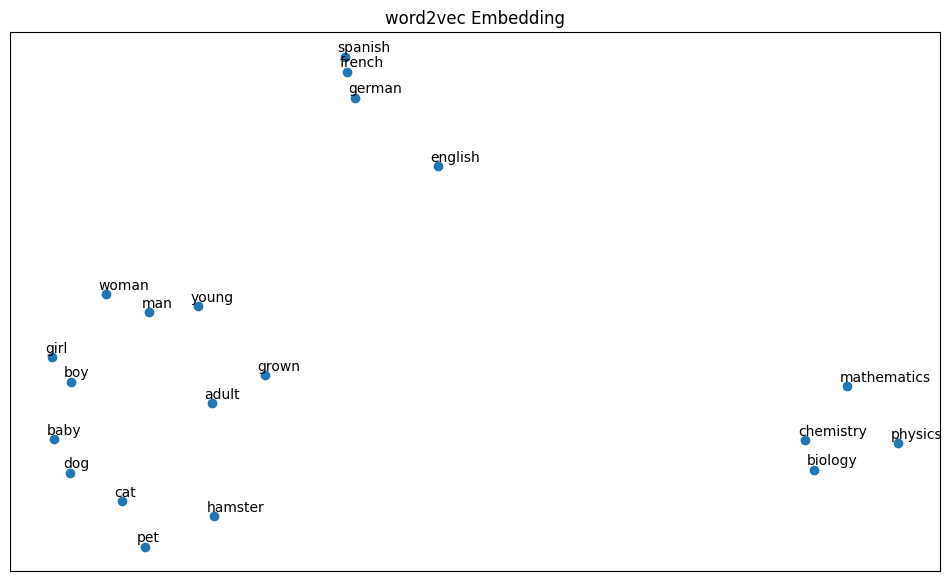

In [76]:
plot_embeds(["dog", "cat", "hamster", "pet"] +                   # animals
            ["boy", "girl", "man", "woman"] +                    # humans
            ["grown", "adult", "young", "baby"] +                # age
            ["german", "english", "spanish", "french"] +         # languages
            ["mathematics", "physics", "biology", "chemistry"],  # natural sciences
            title = "word2vec Embedding")

In [77]:
!pip install nltk

In [78]:
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [79]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [80]:
import pandas as pd
import numpy as np
url="/content/drive/MyDrive/Deep Learning/lab9/bbc_text.csv"
dataset = pd.read_csv(url)
dataset['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [81]:
dataset = dataset[dataset.category == 'sport']
dataset.index = np.arange(len(dataset))
dataset = dataset[:100]
print(dataset.head())
print(len(dataset))

  category                                               text
0    sport  tigers wary of farrell  gamble  leicester say ...
1    sport  yeading face newcastle in fa cup premiership s...
2    sport  henman hopes ended in dubai third seed tim hen...
3    sport  wilkinson fit to face edinburgh england captai...
4    sport  moya emotional after davis cup win carlos moya...
100


In [82]:
corpus = dataset['text'].str.cat(sep=' ')

In [83]:
print(corpus)

tigers wary of farrell  gamble  leicester say they will not be rushed into making a bid for andy farrell should the great britain rugby league captain decide to switch codes.   we and anybody else involved in the process are still some way away from going to the next stage   tigers boss john wells told bbc radio leicester.  at the moment  there are still a lot of unknowns about andy farrell  not least his medical situation.  whoever does take him on is going to take a big  big gamble.  farrell  who has had persistent knee problems  had an operation on his knee five weeks ago and is expected to be out for another three months. leicester and saracens are believed to head the list of rugby union clubs interested in signing farrell if he decides to move to the 15-man game.  if he does move across to union  wells believes he would better off playing in the backs  at least initially.  i m sure he could make the step between league and union by being involved in the centre   said wells.  i th

In [84]:
len(corpus)

186039

In [85]:
stemmer = PorterStemmer()
def preprocess(sentence):
    wordnet_lemmatizer = WordNetLemmatizer()
    sentence = stemmer.stem(sentence) #remove endings
    sentence = sentence.lower() #for writing from small litter
    tokenizer = RegexpTokenizer(r'\w+') #  #for removing puntuations
    tokens = tokenizer.tokenize(sentence)
    filtered_words = [wordnet_lemmatizer.lemmatize(word) for word in tokens]
    filtered_words = [w for w in tokens if not w in stopwords.words('english')] #remove stop words
    filtered_words = [c for c in filtered_words if not c.isdigit()] #remove numbers
    return " ".join(filtered_words)

In [86]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
corpus = preprocess(corpus)

In [88]:
len(corpus)

124235

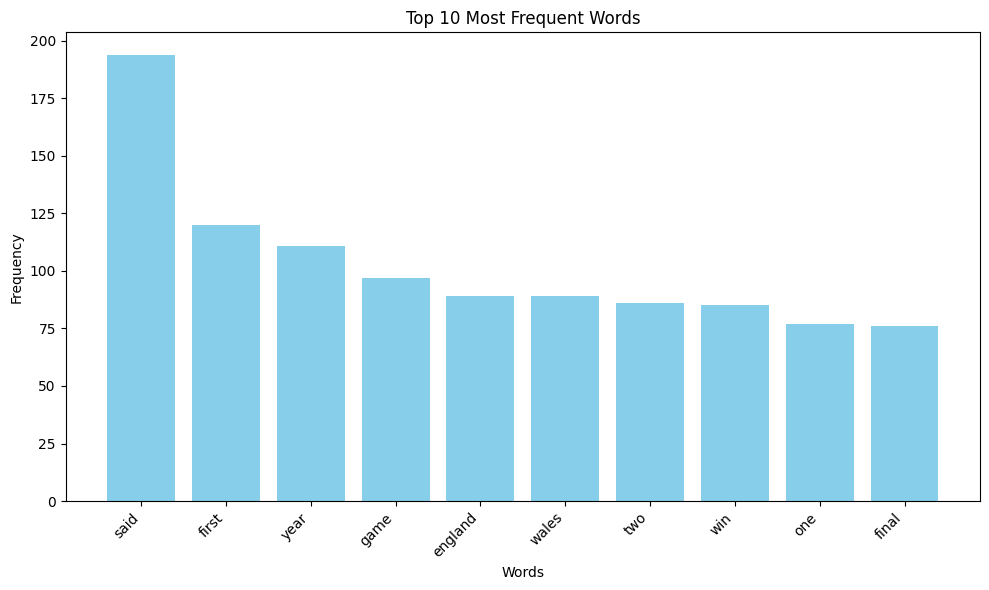

In [89]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


stop_words = set(stopwords.words('english'))
filtered_words = word_tokenize(corpus)
word_freq = Counter(filtered_words)
top_words = word_freq.most_common(10)
words, frequencies = zip(*top_words)

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [90]:
print(stop_words)

{'been', 'against', 'mightn', 'doing', 'yours', 'into', 'some', "shan't", 'i', 'my', 'we', "doesn't", 'shouldn', 'ourselves', 'so', "hadn't", 't', 'can', "isn't", 'am', 'yourself', 'ain', 'don', 'y', 'once', 'there', 'by', "haven't", "needn't", 'this', 'wouldn', 'over', 'aren', 'than', 'me', 'was', 'no', 'through', 'him', 'just', 've', 'haven', 'during', "shouldn't", "didn't", 'on', "you've", 'your', 'that', 'hadn', 'his', 'themselves', 'further', 'only', 'with', 'theirs', 'their', "you're", 'he', 'from', 'wasn', 'had', 'whom', 'hasn', 'you', 'each', 'the', 'here', 'doesn', 'more', 'shan', 'too', 'any', 'other', "she's", "wouldn't", "hasn't", 'have', 'under', 'why', "it's", 'because', 'about', 'has', 'and', 'for', 'when', 'our', 'being', 'now', 'until', 'itself', 'is', 's', 'ours', 'they', "don't", 're', "mustn't", 'does', 'up', "that'll", "should've", 'down', 'few', 'himself', 'or', 'its', 'a', 'needn', 'then', 'before', "aren't", 'myself', 'most', 'will', "mightn't", 'those', 'again'

In [92]:
similar_words = model.wv.most_similar('football', topn=10)
print(similar_words)

[('footballer', 0.9906811118125916), ('cheating', 0.9845662713050842), ('challenging', 0.9831953048706055), ('opening', 0.9829720854759216), ('considering', 0.9825412631034851), ('replacing', 0.9822834134101868), ('entering', 0.9822409152984619), ('competing', 0.982183575630188), ('ball', 0.9820379018783569), ('battering', 0.9820142388343811)]


In [93]:
similar_words = model.wv.most_similar('ball', topn=10)
print(similar_words)

[('cheating', 0.9866693019866943), ('comprised', 0.9856288433074951), ('carling', 0.9855864644050598), ('operation', 0.985414981842041), ('meeting', 0.9853578805923462), ('putting', 0.9852768778800964), ('falling', 0.9851879477500916), ('clearing', 0.9850819706916809), ('federation', 0.9850427508354187), ('concentrating', 0.9849556684494019)]


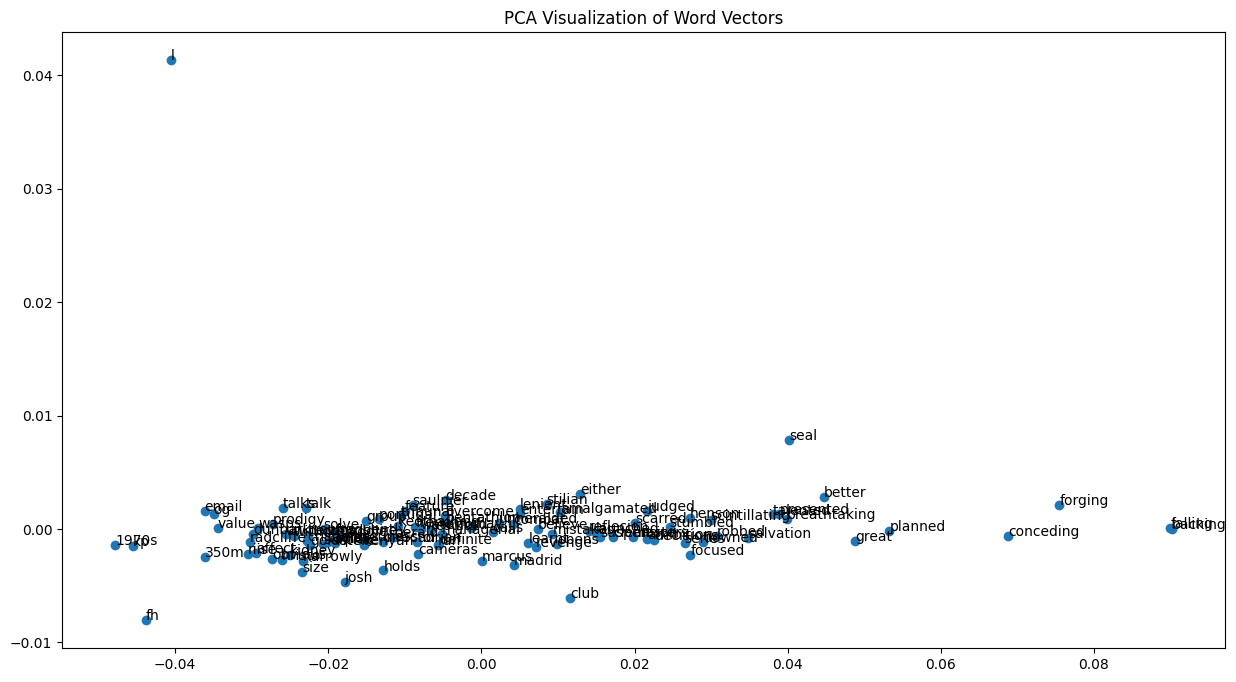

In [94]:
vocab = list(set(filtered_words))
words_of_interest = vocab[:100]
word_vectors = [model.wv[word] for word in words_of_interest]

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Plot the words
plt.figure(figsize=(15, 8))
plt.scatter(result[:, 0], result[:, 1])

# Annotate points with words
for i, word in enumerate(words_of_interest):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title('PCA Visualization of Word Vectors')
plt.show()

In [102]:
vocab

['great',
 'amalgamated',
 'french',
 'pentathlon',
 'focused',
 'unheralded',
 'wasps',
 'breathtaking',
 'gerald',
 'marcus',
 'feature',
 'keothavong',
 'saulnier',
 '350m',
 'affect',
 'talks',
 'portugal',
 'stilian',
 'scarred',
 'fh',
 'cameras',
 'hristo',
 'conceding',
 'josh',
 'learnt',
 'talented',
 'planned',
 'talk',
 'seal',
 'salvation',
 'unknowns',
 'taylor',
 'henson',
 'director',
 'run',
 'robbed',
 'launched',
 'shay',
 'riise',
 'hertfordshire',
 'group',
 'cristiano',
 'og',
 'kenyan',
 'value',
 'forging',
 'falling',
 'adrian',
 'presented',
 'entertain',
 'l',
 'souness',
 'series',
 'revenge',
 'either',
 'dunbar',
 'judged',
 'decisions',
 'stumbled',
 'mistakes',
 'masters',
 'managerial',
 'club',
 'email',
 'suspension',
 'calls',
 'goldstein',
 'waterford',
 'decade',
 'size',
 'backing',
 'better',
 'amibition',
 'opens',
 'lenient',
 'withdrew',
 'results',
 'solely',
 'radcliffe',
 'clean',
 'surprise',
 'kidney',
 'madrid',
 'reflecion',
 'prodigy',

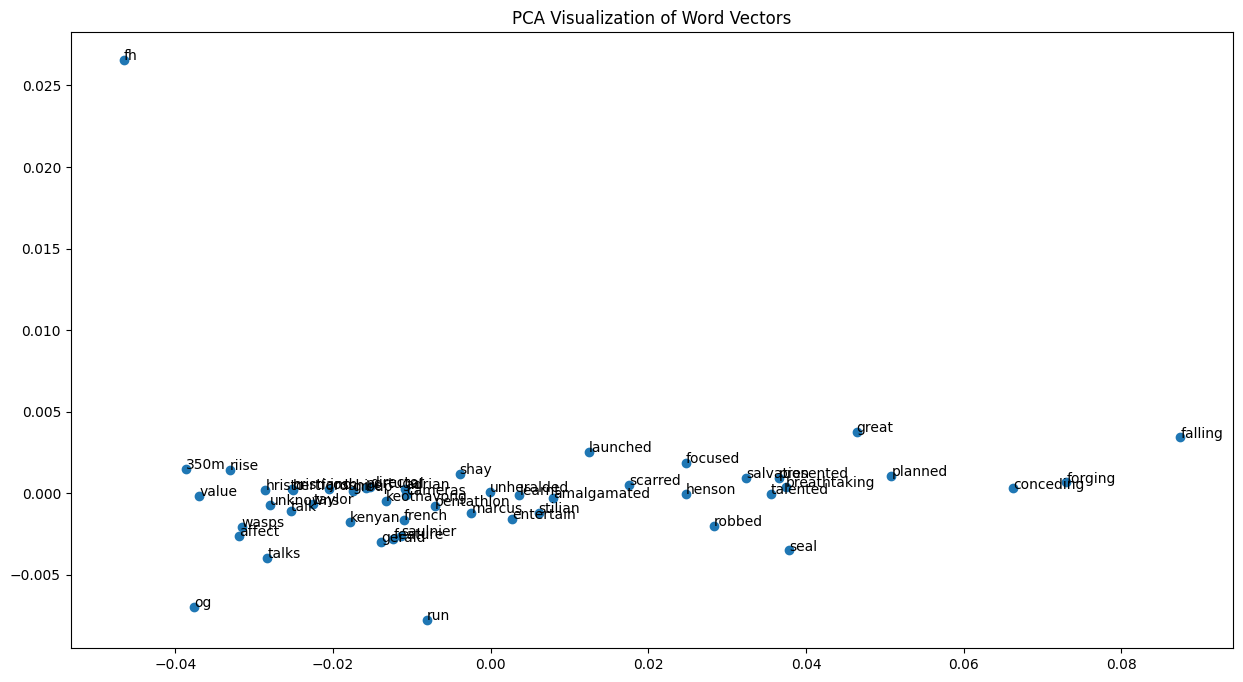

In [95]:
words_of_interest = vocab[:50]
word_vectors = [model.wv[word] for word in words_of_interest]

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

# Plot the words
plt.figure(figsize=(15, 8))
plt.scatter(result[:, 0], result[:, 1])

# Annotate points with words
for i, word in enumerate(words_of_interest):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.title('PCA Visualization of Word Vectors')
plt.show()

In [96]:
corpus

'tigers wary farrell gamble leicester say rushed making bid andy farrell great britain rugby league captain decide switch codes anybody else involved process still way away going next stage tigers boss john wells told bbc radio leicester moment still lot unknowns andy farrell least medical situation whoever take going take big big gamble farrell persistent knee problems operation knee five weeks ago expected another three months leicester saracens believed head list rugby union clubs interested signing farrell decides move man game move across union wells believes would better playing backs least initially sure could make step league union involved centre said wells think england would prefer progress position back row make use rugby league skills within forwards jury whether cross divide club balance struck cost gamble option bringing ready made replacement yeading face newcastle fa cup premiership side newcastle united face trip ryman premier league leaders yeading fa cup third round

**Task**

In [106]:
singapore_df = pd.read_csv('/content/drive/MyDrive/Deep Learning/lab9/singapore_airlines_reviews.csv')

In [107]:
singapore_df.head()

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0


In [108]:
text_singapore = singapore_df['text']

In [109]:
text_singapore

0       We used this airline to go from Singapore to L...
1       The service on Singapore Airlines Suites Class...
2       Booked, paid and received email confirmation f...
3       Best airline in the world, seats, food, servic...
4       Premium Economy Seating on Singapore Airlines ...
                              ...                        
9995    First part done with Singapore Airlines - acce...
9996    And again a great Flight with Singapore Air. G...
9997    We flew business class from Frankfurt, via Sin...
9998    As always, the A380 aircraft was spotlessly pr...
9999    As always, Singapore Airlines has done it agai...
Name: text, Length: 10000, dtype: object

In [116]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from gensim.models import KeyedVectors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))
tokenized_text = [word.lower() for text in text_singapore.dropna() for word in word_tokenize(text) if word.isalpha() and word.lower() not in stop_words]

# Find the 10 most frequent words
word_freq = Counter(tokenized_text)
most_common_words = word_freq.most_common(10)
print("10 most frequent words:", most_common_words)


10 most frequent words: [('flight', 12182), ('singapore', 11676), ('airlines', 7537), ('service', 6863), ('food', 5581), ('good', 5259), ('airline', 3963), ('time', 3697), ('economy', 3581), ('seats', 3479)]


In [126]:
tokenized_text[:10]

['used',
 'airline',
 'go',
 'singapore',
 'london',
 'heathrow',
 'issues',
 'tickets',
 'cancelled',
 'one']

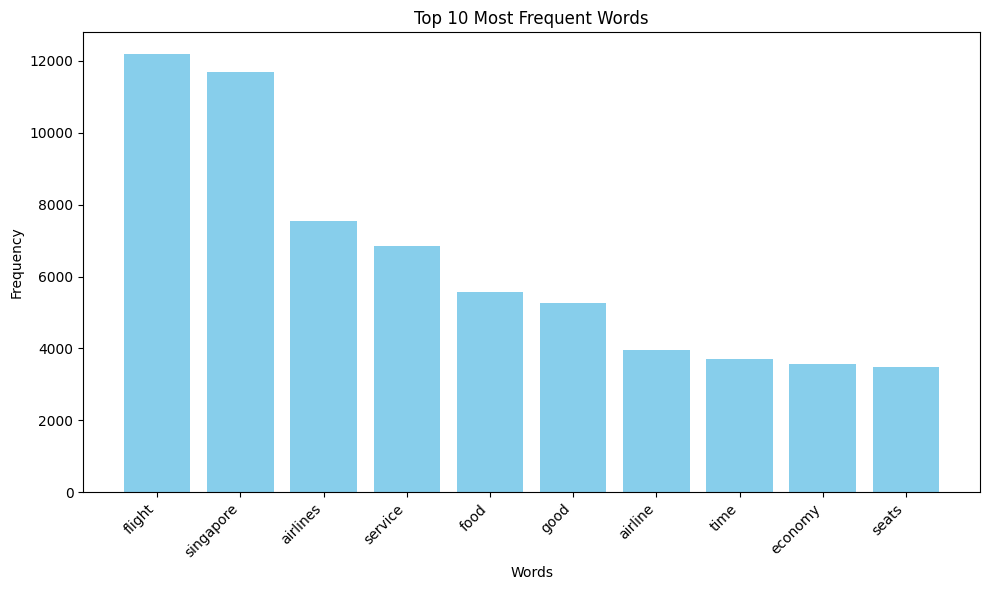

In [127]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


stop_words = set(stopwords.words('english'))
filtered_words = tokenized_text
word_freq = Counter(filtered_words)
top_words = word_freq.most_common(10)
words, frequencies = zip(*top_words)

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [134]:
glove_model_path_2 = "glove-wiki-gigaword-300"
print(api.info(glove_model_path_2))
glove_2 = api.load(glove_model_path_2)

{'num_records': 400000, 'file_size': 394362229, 'base_dataset': 'Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)', 'reader_code': 'https://github.com/RaRe-Technologies/gensim-data/releases/download/glove-wiki-gigaword-300/__init__.py', 'license': 'http://opendatacommons.org/licenses/pddl/', 'parameters': {'dimension': 300}, 'description': 'Pre-trained vectors based on Wikipedia 2014 + Gigaword, 5.6B tokens, 400K vocab, uncased (https://nlp.stanford.edu/projects/glove/).', 'preprocessing': 'Converted to w2v format with `python -m gensim.scripts.glove2word2vec -i <fname> -o glove-wiki-gigaword-300.txt`.', 'read_more': ['https://nlp.stanford.edu/projects/glove/', 'https://nlp.stanford.edu/pubs/glove.pdf'], 'checksum': '29e9329ac2241937d55b852e8284e89b', 'file_name': 'glove-wiki-gigaword-300.gz', 'parts': 1}


In [137]:
similar_words_glove = {}
for word, _ in most_common_words:
    similar_words_glove[word] = glove_2.most_similar(word, topn=4)

In [138]:
similar_words_glove

{'flight': [('flights', 0.700596809387207),
  ('plane', 0.6840180158615112),
  ('flying', 0.6469150185585022),
  ('pilots', 0.6361315250396729)],
 'singapore': [('malaysia', 0.6999341249465942),
  ('kong', 0.629603385925293),
  ('hong', 0.6225860118865967),
  ('malaysian', 0.5901401042938232)],
 'airlines': [('airline', 0.8510012626647949),
  ('airways', 0.7427115440368652),
  ('flights', 0.6629230380058289),
  ('carrier', 0.6091932058334351)],
 'service': [('services', 0.798843264579773),
  ('.', 0.48883816599845886),
  ('news', 0.48856452107429504),
  ('network', 0.4852060079574585)],
 'food': [('foods', 0.6694071292877197),
  ('supplies', 0.6068812608718872),
  ('eat', 0.5903003215789795),
  ('meat', 0.5677605271339417)],
 'good': [('better', 0.765958309173584),
  ('really', 0.7361074686050415),
  ('always', 0.7173537611961365),
  ('you', 0.7073798775672913)],
 'airline': [('airlines', 0.8510012626647949),
  ('airways', 0.726575493812561),
  ('lufthansa', 0.6747358441352844),
  ('fl

In [163]:
similar_words_list = [(word,) + tuple(sim_word for sim_word, _ in sim_words) for word, sim_words in similar_words_glove.items()]

similar_words_list = [item for sublist in similar_words_list for item in sublist]

In [164]:
similar_words_list

['flight',
 'flights',
 'plane',
 'flying',
 'pilots',
 'singapore',
 'malaysia',
 'kong',
 'hong',
 'malaysian',
 'airlines',
 'airline',
 'airways',
 'flights',
 'carrier',
 'service',
 'services',
 '.',
 'news',
 'network',
 'food',
 'foods',
 'supplies',
 'eat',
 'meat',
 'good',
 'better',
 'really',
 'always',
 'you',
 'airline',
 'airlines',
 'airways',
 'lufthansa',
 'flights',
 'time',
 'when',
 'before',
 'but',
 'just',
 'economy',
 'economic',
 'economies',
 'recession',
 'growth',
 'seats',
 'seat',
 'seating',
 'parliamentary',
 'majority']

In [166]:
embeddings_glove = {word: glove_2[word] for word in similar_words_list}

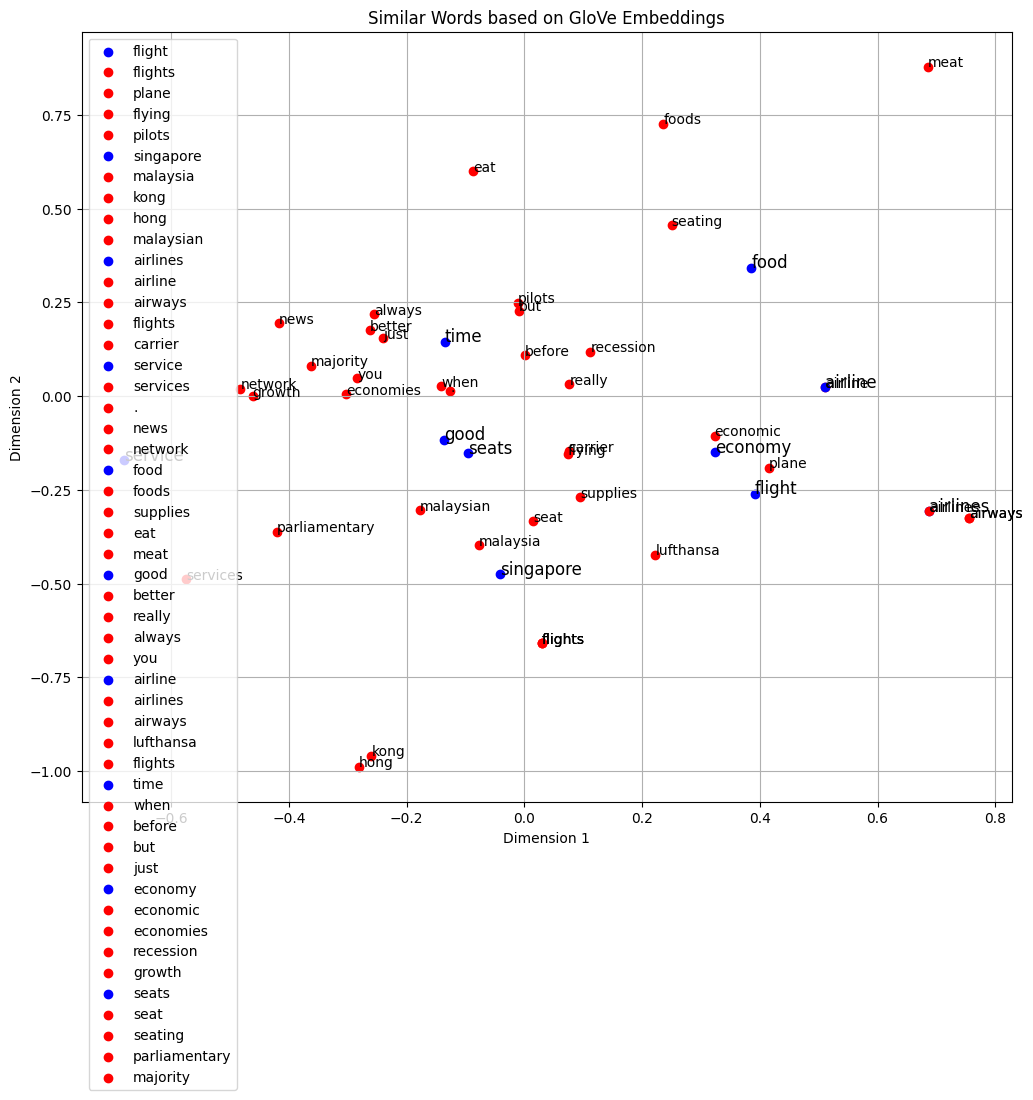

In [170]:
import matplotlib.pyplot as plt

def plot_dot_graph(similar_words_dict, embeddings_dict, title):
    plt.figure(figsize=(12, 10))  # Adjust the figure size here
    for word, sim_words in similar_words_dict.items():
        if word in embeddings_dict:
            emb = embeddings_dict[word]
            plt.scatter(emb[0], emb[1], label=word, color='blue')
            plt.text(emb[0], emb[1], word, fontsize=12)
            for sim_word, _ in sim_words:
                if sim_word in embeddings_dict:
                    sim_emb = embeddings_dict[sim_word]
                    plt.scatter(sim_emb[0], sim_emb[1], label=sim_word, color='red')
                    plt.text(sim_emb[0], sim_emb[1], sim_word, fontsize=10)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_dot_graph(similar_words_glove, embeddings_glove, "Similar Words based on GloVe Embeddings")



In [172]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [175]:
similar_words_gensim = {}
for word, _ in most_common_words:
    if word in model.wv.key_to_index:
      similar_words_gensim[word] = model.wv.most_similar(word, topn=4)

In [185]:
similar_words_gensim

{'time': [('trees', 0.1459505707025528),
  ('interface', 0.050486352294683456),
  ('user', 0.04158509895205498),
  ('minors', 0.03476494178175926)]}

In [180]:
pip install gensim

In [189]:
type(tokenized_text)

list

In [190]:
from gensim.models.word2vec import Word2Vec
sentences = [[word] for word in tokenized_text]

model = Word2Vec(sentences)

In [199]:
similar_words_gensim = {}
for word, _ in most_common_words:
    similar_words_gensim[word] =  model.wv.most_similar(word, topn=4)

In [201]:
similar_words_gensim

{'flight': [('course', 0.3595535457134247),
  ('honor', 0.3546643853187561),
  ('eyeshades', 0.31682366132736206),
  ('spore', 0.31479284167289734)],
 'singapore': [('jan', 0.41102758049964905),
  ('option', 0.3641005754470825),
  ('suck', 0.34202200174331665),
  ('blatantly', 0.3313186466693878)],
 'airlines': [('fussy', 0.3764644265174866),
  ('helpful', 0.3698463439941406),
  ('da', 0.33246079087257385),
  ('pants', 0.3167325556278229)],
 'service': [('robot', 0.3384031057357788),
  ('checks', 0.31875479221343994),
  ('complaining', 0.30787110328674316),
  ('info', 0.3054334819316864)],
 'food': [('everyday', 0.37755849957466125),
  ('called', 0.32869330048561096),
  ('substandard', 0.32638633251190186),
  ('pics', 0.31739896535873413)],
 'good': [('youngest', 0.3406830132007599),
  ('klm', 0.3403392434120178),
  ('mainly', 0.32514628767967224),
  ('happy', 0.31768563389778137)],
 'airline': [('hours', 0.3488037586212158),
  ('smartly', 0.34090596437454224),
  ('lead', 0.31664675474

In [202]:
similar_words_list_gensim = [(word,) + tuple(sim_word for sim_word, _ in sim_words) for word, sim_words in similar_words_gensim.items()]

similar_words_list_gensim = [item for sublist in similar_words_list_gensim for item in sublist]

In [204]:
similar_words_list_gensim[:10]

['flight',
 'course',
 'honor',
 'eyeshades',
 'spore',
 'singapore',
 'jan',
 'option',
 'suck',
 'blatantly']

In [206]:
embeddings_gensim = {word: model.wv[word] for word in similar_words_list_gensim}

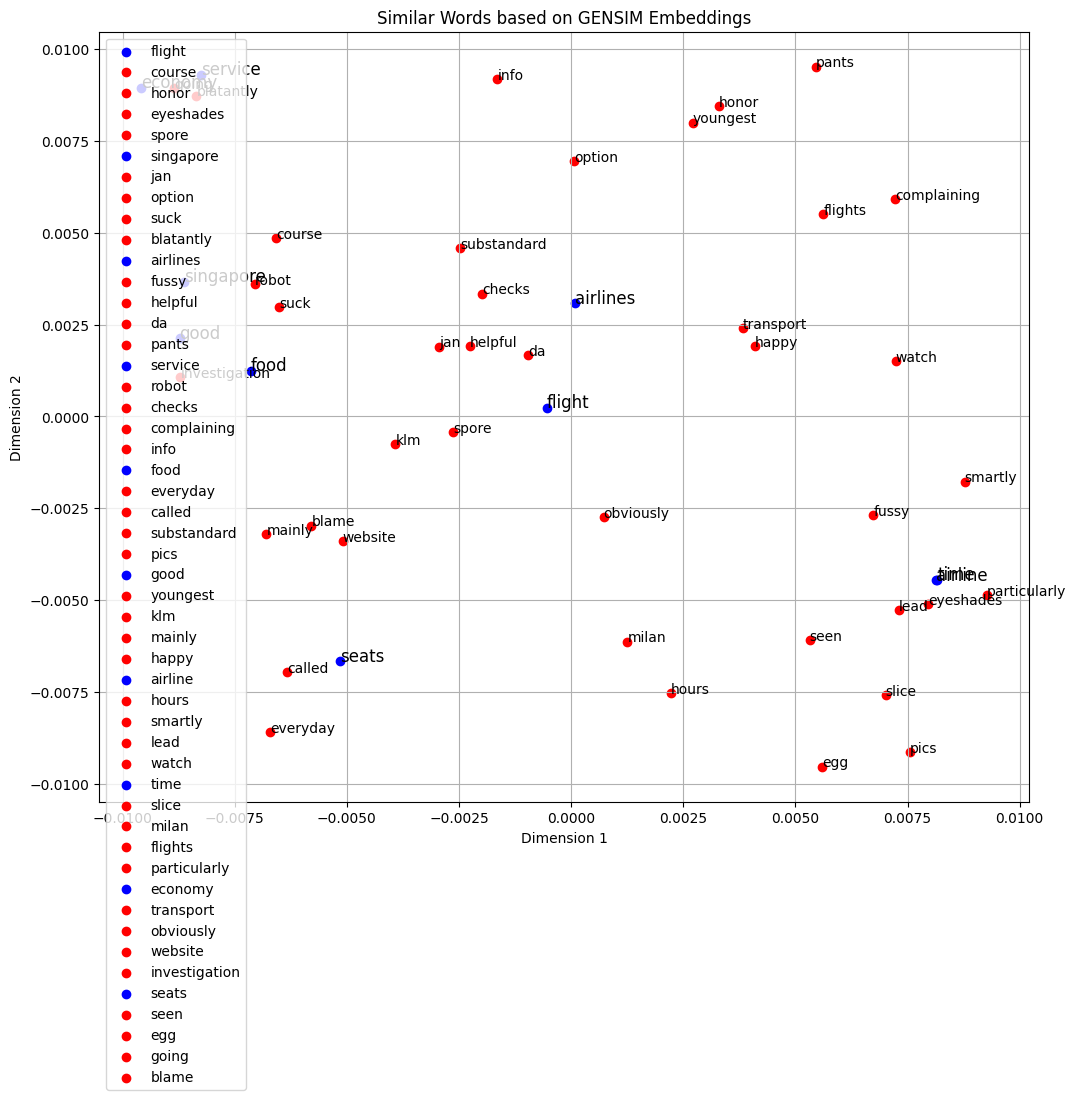

In [208]:
import matplotlib.pyplot as plt

def plot_dot_graph(similar_words_dict, embeddings_dict, title):
    plt.figure(figsize=(12, 10))  # Adjust the figure size here
    for word, sim_words in similar_words_dict.items():
        if word in embeddings_dict:
            emb = embeddings_dict[word]
            plt.scatter(emb[0], emb[1], label=word, color='blue')
            plt.text(emb[0], emb[1], word, fontsize=12)
            for sim_word, _ in sim_words:
                if sim_word in embeddings_dict:
                    sim_emb = embeddings_dict[sim_word]
                    plt.scatter(sim_emb[0], sim_emb[1], label=sim_word, color='red')
                    plt.text(sim_emb[0], sim_emb[1], sim_word, fontsize=10)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_dot_graph(similar_words_gensim, embeddings_gensim, "Similar Words based on GENSIM Embeddings")

# Task
### Replace the text corpus for another one (you can chose by yourself) and find 10 the most frequent words
### For the 10 the most frequent words calculate 4 the mosts simular words from GLOVE and from Word2Vec (you will have a list with 50 words in total)
### Vizualize the dot of words in 2 separate graphs (1st with word embeddings from GLOVE 2nd with word embeddings from Word2Vec) and compare the graphs
### Try to inderstans why you have simular / different results
## Deadline the next week

In [101]:
len(corpus)

124235

## The next code is not for practice, it is only for your information

In [97]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [98]:
from nltk.corpus import wordnet as wn
import networkx as nx
import matplotlib.pyplot as plt

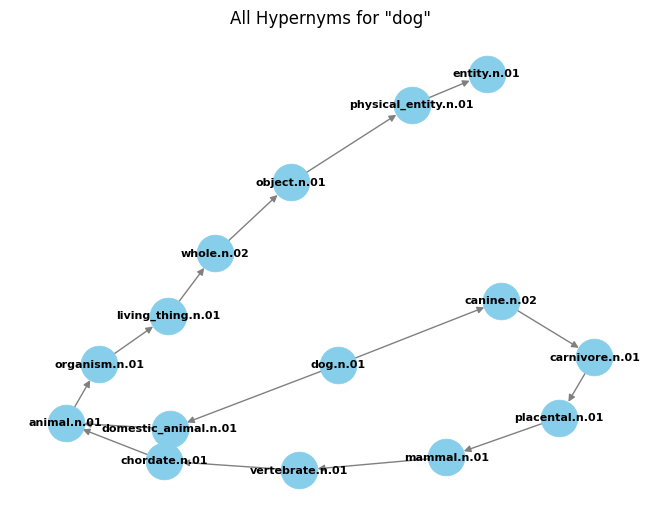

In [99]:
from nltk.corpus import wordnet as wn
import networkx as nx
import matplotlib.pyplot as plt

def add_hypernyms(graph, synset):
    for hypernym in synset.hypernyms():
        graph.add_edge(synset.name(), hypernym.name())
        add_hypernyms(graph, hypernym)

def visualize_hypernyms(word):
    synset = wn.synsets(word)[0]

    if not synset:
        print(f"No synsets found for the word '{word}'.")
        return

    G = nx.DiGraph()


    G.add_node(synset.name(), label=synset.name())
    add_hypernyms(G, synset)

    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', edge_color='gray', linewidths=0.5)

    plt.title(f'All Hypernyms for "{word}"')
    plt.show()

# Example: Visualize all hypernyms for the word "dog"
visualize_hypernyms("dog")


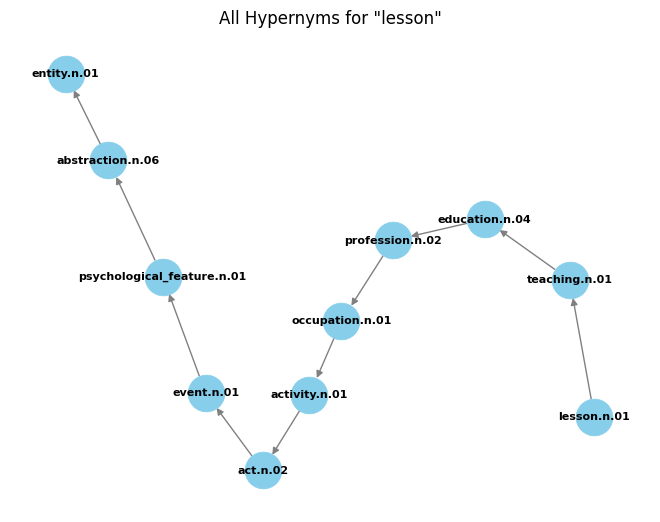

In [100]:
visualize_hypernyms("lesson")